# ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏûÑÌè¨Ìä∏

In [21]:
import os
import cv2
import easyocr
import itertools
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [22]:
# EasyOCR Ï¥àÍ∏∞Ìôî (ÌïúÍ∏Ä + ÏòÅÏñ¥)
reader = easyocr.Reader(['ko', 'en'], gpu=False)

# ÌîÑÎ†àÏûÑ Ïù¥ÎØ∏ÏßÄ Ìè¥Îçî Í≤ΩÎ°ú
frame_folder = '/Users/chami/Desktop/monu/data/frames/20250321_1.0'  # ÎÑàÍ∞Ä Ï†ÄÏû•Ìïú Í≤ΩÎ°úÎ°ú Î∞îÍøîÏ§ò

# Í≤∞Í≥º Ï†ÄÏû•Ìï† Î¶¨Ïä§Ìä∏
ocr_results = []

# Ïù¥ÎØ∏ÏßÄ ÏàúÌöå
for filename in sorted(os.listdir(frame_folder)):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        img_path = os.path.join(frame_folder, filename)
        image = cv2.imread(img_path)

        # Ïù¥ÎØ∏ÏßÄÏóêÏÑú ÏûêÎßâ Î∂ÄÎ∂ÑÎßå crop (ÌïòÎã® 30%)
        h, w, _ = image.shape
        cropped = image[int(h*0):, :]

        # OCR ÏàòÌñâ
        result = reader.readtext(cropped, detail=0)  # detail=0Ïù¥Î©¥ ÌÖçÏä§Ìä∏Îßå Î¶¨Ïä§Ìä∏Î°ú Î∞òÌôò
        text = ' '.join(result).strip()
        print(f"{filename}: {text}")
        ocr_results.append((filename, text))

Using CPU. Note: This module is much faster with a GPU.


frame_00001.jpg: TARA Î™®Ï¶ò ÎäêÎÇåÎÜìÎã§Îäî ÏûêÎùº  ÌôïÎØºÌïòÎü¨ Í∞öÎã§Í∞Ä. .
frame_00002.jpg: ZARA Î™®Ï¶ò ÎäêÎÇåÏ¢ÖÎã§Îäî ÏûêÎùº ÌôïÎØºÌïòÎü¨ Í∞öÎã§Í∞Ä. S/SNew
frame_00003.jpg: TARA ÏΩîÏ¶ò ÎäêÎÇåÏ¢ÖÎã§Îäî ÏûêÎùº ÌôïÎØºÌïòÎü¨ Í∞öÎã§Í∞Ä. SIS New! Ìëπ


KeyboardInterrupt: 

## Ï†ÑÏ≤òÎ¶¨ Ìï®Ïàò

In [14]:
def grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def blur(img):
    return cv2.GaussianBlur(img, (5, 5), 0)

def otsu(img):
    if len(img.shape) == 3:
        img = grayscale(img)
    _, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return thresh

def adaptive(img):
    if len(img.shape) == 3:
        img = grayscale(img)
    blur_img = cv2.GaussianBlur(img, (5, 5), 0)
    return cv2.adaptiveThreshold(blur_img, 255,
                                 cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                 cv2.THRESH_BINARY, 11, 2)

def contrast(img):
    img = grayscale(img) if len(img.shape) == 3 else img
    return cv2.convertScaleAbs(img, alpha=1.5, beta=20)

def invert(img):
    img = grayscale(img) if len(img.shape) == 3 else img
    _, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return cv2.bitwise_not(thresh)

## Ï†ÑÏ≤òÎ¶¨ Ï°∞Ìï© ÌÖåÏä§Ìä∏

In [ ]:
# Ï°∞Ìï©Ìï† Ï†ÑÏ≤òÎ¶¨ Ìï®Ïàò Î™©Î°ù
preprocess_funcs = {
    'grayscale': grayscale,
    'blur': blur,
    'otsu': otsu,
    'adaptive': adaptive,
    'contrast': contrast,
    'invert': invert
}

# ÌÖåÏä§Ìä∏ ÎåÄÏÉÅ Ïù¥ÎØ∏ÏßÄ (ÏûêÎßâ ÌïòÎã® crop Ï†ÅÏö©)
img = cv2.imread("/Users/chami/Desktop/monu/data/frames/20250321_1.0/frame_00016.jpg")
h, w, _ = img.shape
img = img[int(h*0.7):, :]  # ÏûêÎßâ ÏòÅÏó≠

# Í≤∞Í≥º Ï†ÄÏû•
results = {}

# Ï†ÑÏ≤òÎ¶¨ Ìï®Ïàò Ï°∞Ìï©: 1~3Í∞úÏßúÎ¶¨ Ï°∞Ìï©
for r in range(1, 4):
    for combo in itertools.permutations(preprocess_funcs.keys(), r):
        processed = img.copy()
        try:
            for step in combo:
                processed = preprocess_funcs[step](processed)
            text = ' '.join(reader.readtext(processed, detail=0))
            results[" ‚Üí ".join(combo)] = text

            # ÏãúÍ∞ÅÌôî ÏòàÏãú
            plt.figure()
            plt.imshow(processed, cmap='gray')
            plt.title(f"{' ‚Üí '.join(combo)}\n{text}")
            plt.axis('off')
            plt.show()
        except Exception as e:
            print(f"‚ùå Ï°∞Ìï© Ïã§Ìå®: {' ‚Üí '.join(combo)} / {e}")

Using CPU. Note: This module is much faster with a GPU.
/Users/chami/anaconda3/envs/monu/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/chami/anaconda3/envs/monu/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46972 (\N{HANGUL SYLLABLE RA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/chami/anaconda3/envs/monu/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46385 (\N{HANGUL SYLLABLE DDAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/chami/anaconda3/envs/monu/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46308 (\N{HANGUL SYLLABLE DEUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/chami/anaconda3/envs/monu/lib/python3.10/site-package

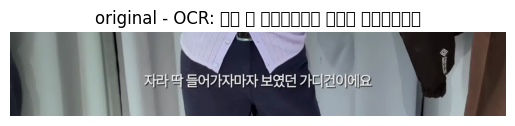

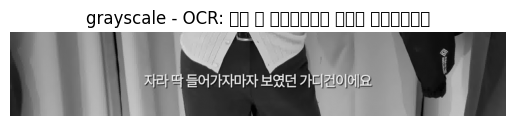

/Users/chami/anaconda3/envs/monu/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


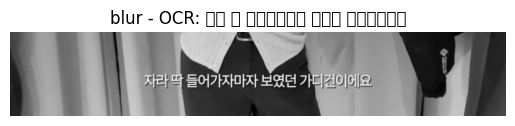

/Users/chami/anaconda3/envs/monu/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/chami/anaconda3/envs/monu/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45912 (\N{HANGUL SYLLABLE DEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/chami/anaconda3/envs/monu/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44428 (\N{HANGUL SYLLABLE GWEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/chami/anaconda3/envs/monu/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


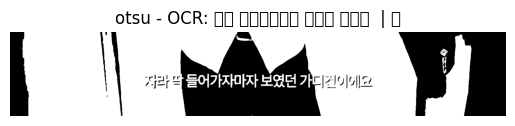

/Users/chami/anaconda3/envs/monu/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/chami/anaconda3/envs/monu/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46989 (\N{HANGUL SYLLABLE RAB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/chami/anaconda3/envs/monu/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47932 (\N{HANGUL SYLLABLE MUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/chami/anaconda3/envs/monu/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/chami/anaconda3/envs/monu/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47549

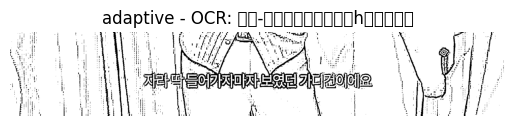

/Users/chami/anaconda3/envs/monu/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45817 (\N{HANGUL SYLLABLE DANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/chami/anaconda3/envs/monu/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47700 (\N{HANGUL SYLLABLE ME}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/chami/anaconda3/envs/monu/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


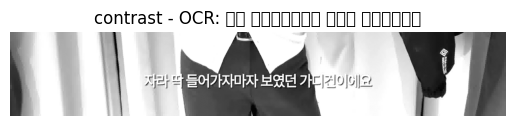

/Users/chami/anaconda3/envs/monu/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46609 (\N{HANGUL SYLLABLE DDOG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/chami/anaconda3/envs/monu/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50687 (\N{HANGUL SYLLABLE YEOS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/chami/anaconda3/envs/monu/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/chami/anaconda3/envs/monu/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/chami/anaconda3/envs/monu/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 457

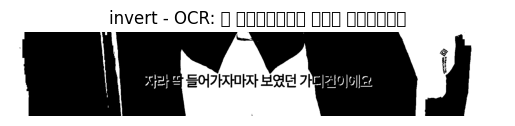


üîç OCR Í≤∞Í≥º ÎπÑÍµê
[original] ÏûêÎùº Îî± Îì§Ïñ¥Í∞ÄÏûêÎßàÏûê Î≥¥ÌòÑÎã® Í∞ÄÎîîÍ±¥Ïù¥ÏóêÏöî
[grayscale] ÏûêÎùº Îî± Îì§Ïñ¥Í∞ÄÏûêÎßàÏûê Î≥¥ÌòÑÎã® Í∞ÄÎîîÍ±¥Ïù¥ÏóêÏöî
[blur] ÏûêÎùº Îî± Îì§Ïñ¥Í∞ÄÏûêÎßàÏûê Î≥¥ÌòÑÎÖÑ Í∞ÄÎîîÍ±¥Ïù¥ÏóêÏöî
[otsu] ÎßàÎùº Îì§Ïñ¥Í∞ÄÏßÄÎßàÏûê Î≥¥ÌòÑÎçò Í∞ÄÎîîÍ∂å  | Í≥†
[adaptive] Ï∞®Îûç-Î¨ºÏñ¥Î¶¨Ï∞®ÎßàÏûêÎ≥¥ÌòÑÎ¶ΩhÎ¶¨Î†åÏù¥ÏóêÏöî
[contrast] Ï∞®Îùº Îî±Îì§Ïñ¥Í∞ÄÏûêÎßàÏûê Î≥¥ÌòÑÎãπ Í∞ÄÎîîÍ±¥Ïù¥Î©îÎèÑ
[invert] Îùº ÎòëÎì§Ïñ¥Í∞ÄÏûêÎßàÏûê Î≥¥ÏóøÎã® Í∞ÄÎîîÍ±¥ÎØ∏Îç∞Îã§


In [ ]:
reader = easyocr.Reader(['ko', 'en'], gpu=False)

def apply_preprocessing(image, method):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    if method == "grayscale":
        return gray
    elif method == "blur":
        return cv2.GaussianBlur(gray, (5, 5), 0)
    elif method == "otsu":
        blur = cv2.GaussianBlur(gray, (5, 5), 0)
        _, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        return thresh
    elif method == "adaptive":
        blur = cv2.GaussianBlur(gray, (5, 5), 0)
        return cv2.adaptiveThreshold(blur, 255,
                                     cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                     cv2.THRESH_BINARY, 11, 2)
    elif method == "contrast":
        return cv2.convertScaleAbs(gray, alpha=1.5, beta=20)
    elif method == "invert":
        _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        return cv2.bitwise_not(thresh)
    else:
        return image  # original

# ÌîÑÎ†àÏûÑ Ïù¥ÎØ∏ÏßÄ Í≤ΩÎ°ú
img_path = "/Users/chami/Desktop/monu/data/frames/20250321_1.0/frame_00014.jpg"
image = cv2.imread(img_path)
h, w, _ = image.shape
cropped = image[int(h*0.7):, :]  # ÏûêÎßâ ÏòÅÏó≠Îßå

methods = ["original", "grayscale", "blur", "otsu", "adaptive", "contrast", "invert"]

# Ïã§Ìóò Í≤∞Í≥º Ï†ÄÏû•
results = {}

for method in methods:
    processed = apply_preprocessing(cropped, method)
    result_texts = reader.readtext(processed, detail=0)
    results[method] = ' '.join(result_texts)

    # ÏãúÍ∞ÅÌôîÎèÑ Ìï®Íªò Î≥¥Í≥† Ïã∂Îã§Î©¥
    plt.figure()
    plt.imshow(processed, cmap='gray')
    plt.title(f"{method} - OCR: {results[method]}")
    plt.axis('off')
    plt.show()

# Í≤∞Í≥º Ï∂úÎ†•
print("\nüîç OCR Í≤∞Í≥º ÎπÑÍµê")
for method, text in results.items():
    print(f"[{method}] {text}")